## DEM extraction

This is a presentation of the erddap retrieval function in dem module

In [1]:
#to use the full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

import numpy as np


In [4]:
%matplotlib inline

In [5]:
url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/srtm15plus'

In [6]:
grid = xr.open_dataset(url)

In [7]:
grid

<xarray.Dataset>
Dimensions:    (latitude: 43201, longitude: 86401)
Coordinates:
  * latitude   (latitude) float64 -90.0 -90.0 -89.99 -89.99 -89.98 -89.98 ...
  * longitude  (longitude) float64 -180.0 -180.0 -180.0 -180.0 -180.0 -180.0 ...
Data variables:
    z          (latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_email:              dsandwell@ucsd.edu
    creator_name:               David T. Sandwell
    creator_type:               person
    creator_url:                http://topex.ucsd.edu/sandwell/
    Easternmost_Easting:        180.0
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lat_resolution:  0.004166666666666667
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -180.0
    geospatial_lon_resolution:  0.004166666666666667
    geospatial_lon_units:       degrees_eas

In [8]:
#lon range
grid.attrs['geospatial_lon_min'], grid.attrs['geospatial_lon_max']

(-180.0, 180.0)

In [9]:
grid.variables.keys()

[u'latitude', u'longitude', u'z']

In [10]:
#define the lat/lon window and time frame of interest
minlon = 0. 
maxlon =  13.
minlat = 54.5
maxlat = 66.5

In [11]:
mc = np.mean([minlon,maxlon])
mc

6.5

In [12]:
mt = np.mean([minlat,maxlat])
mt

60.5

In [13]:
minlon, maxlon

(0.0, 13.0)

In [14]:
grid.longitude.min()

<xarray.DataArray 'longitude' ()>
array(-180.)

In [15]:
if minlon < grid.longitude.min() : minlon = minlon + 360.
if maxlon < grid.longitude.min() : maxlon = maxlon + 360.
    
if minlon > grid.longitude.max() : minlon = minlon - 360.
if maxlon > grid.longitude.max() : maxlon = maxlon - 360.


In [16]:
minlon, maxlon

(0.0, 13.0)

In [17]:
ilon0 = None
ilon1 = None

In [18]:
if minlon > maxlon :
    ilon0 = grid.longitude.size
    ilon1 = 0

In [19]:
i0=np.abs(grid.longitude.data-minlon).argmin()
i1=np.abs(grid.longitude.data-maxlon).argmin()
i0,i1

(43200, 46320)

In [20]:
j0=np.abs(grid.latitude.data-minlat).argmin()
j1=np.abs(grid.latitude.data-maxlat).argmin()
j0,j1

(34680, 37560)

In [21]:
ilon0,ilon1

(None, None)

In [22]:
if ilon1 != None:
    sh1 = (
    grid[grid.data_vars.keys()[0]]
    .isel(longitude=slice(i0,ilon0),latitude=slice(j0,j1))
    )
    sh2 = (
    grid[grid.data_vars.keys()[0]]
    .isel(longitude=slice(ilon1,i1),latitude=slice(j0,j1))
    )
    sh1.longitude.values = sh1.longitude.values - 360.
    sh = xr.concat([sh1,sh2],dim='longitude')
else: 
    sh = (
    grid.z
    .isel(longitude=slice(i0,i1),latitude=slice(j0,j1))
    )

In [23]:
sh

<xarray.DataArray 'z' (latitude: 2880, longitude: 3120)>
[8985600 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 54.5 54.5 54.51 54.51 54.52 54.52 54.53 ...
  * longitude  (longitude) float64 0.0 0.004167 0.008333 0.0125 0.01667 ...
Attributes:
    _ChunkSizes:      [129 129]
    colorBarMaximum:  8000.0
    colorBarMinimum:  -8000.0
    colorBarPalette:  Topography
    coordsys:         geographic
    ioos_category:    Location
    long_name:        Altitude
    positive:         up
    standard_name:    altitude
    units:            m

In [24]:
sh.attrs = sh.attrs.items() + grid.attrs.items()

In [25]:
sh

<xarray.DataArray 'z' (latitude: 2880, longitude: 3120)>
[8985600 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 54.5 54.5 54.51 54.51 54.52 54.52 54.53 ...
  * longitude  (longitude) float64 0.0 0.004167 0.008333 0.0125 0.01667 ...
Attributes:
    _ChunkSizes:                [129 129]
    colorBarMaximum:            8000.0
    colorBarMinimum:            -8000.0
    colorBarPalette:            Topography
    coordsys:                   geographic
    ioos_category:              Location
    long_name:                  Altitude
    positive:                   up
    standard_name:              altitude
    units:                      m
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_email:              dsandwell@ucsd.edu
    creator_name:               David T. Sandwell
    creator_type:               person
    creator_url:                http://topex.ucsd.edu/sandwell/
    Easternmost_Easting:       

In [26]:
sh.longitude.data.mean()

6.497916666666664

In [27]:
if np.abs(sh.longitude.data.mean()-mc) > 1 : sh.longitude.data = sh.longitude.data + np.sign(mc)*360.

In [28]:
sh.longitude.data

array([0.00000000e+00, 4.16666667e-03, 8.33333333e-03, ...,
       1.29875000e+01, 1.29916667e+01, 1.29958333e+01])

In [29]:
sh.load()

<xarray.DataArray 'z' (latitude: 2880, longitude: 3120)>
array([[  -60.,   -60.,   -60., ...,    -5.,    -5.,    -5.],
       [  -60.,   -60.,   -60., ...,    -6.,    -5.,    -5.],
       [  -60.,   -60.,   -60., ...,    -6.,    -6.,    -6.],
       ...,
       [-3153., -3155., -3156., ...,   -16.,   -21.,   -37.],
       [-3160., -3161., -3161., ...,   -25.,   -38.,   -71.],
       [-3172., -3170., -3168., ...,  -115.,  -137.,  -160.]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 54.5 54.5 54.51 54.51 54.52 54.52 54.53 ...
  * longitude  (longitude) float64 0.0 0.004167 0.008333 0.0125 0.01667 ...
Attributes:
    _ChunkSizes:                [129 129]
    colorBarMaximum:            8000.0
    colorBarMinimum:            -8000.0
    colorBarPalette:            Topography
    coordsys:                   geographic
    ioos_category:              Location
    long_name:                  Altitude
    positive:                   up
    standard_name:              altitude

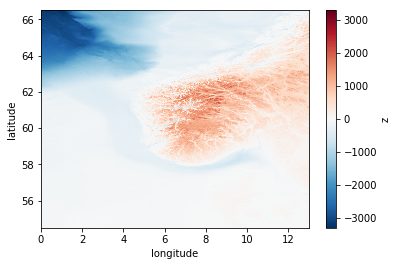

In [30]:
fig, ax = plt.subplots()
sh.plot(ax=ax)

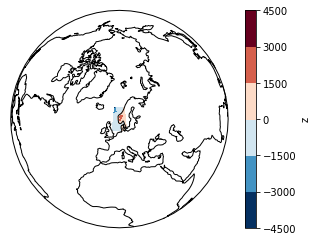

In [31]:
fig, ax = plt.subplots()

ax = plt.axes(projection=ccrs.Orthographic(mc, mt))

sh.plot.contourf(ax=ax, transform=ccrs.PlateCarree());

ax.set_global()
ax.coastlines()

In [32]:
sh.shape

(2880, 3120)

In [33]:
psh = sh.to_pandas()

In [34]:
psh.to_csv('/Users/brey/Downloads/d3d.dep',header=None,index=None,sep=' ')

In [35]:
sh.max()

<xarray.DataArray 'z' ()>
array(2702.)

In [36]:
psh.max().max()

2702.0